Diego Castellanos 20082

Oscar Méndez 20402

# Laboratorio 3: Deep Learning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

## Ejercicio 1

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.1. Análisis Exploratorio

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Primero revisamos que todos los datos sean enteros y no hayan nulos.

In [4]:
print('Tipos de datos:', df.dtypes.unique())
print('Cantidad de NAs:', df.isna().sum().sum())

Tipos de datos: [dtype('int64')]
Cantidad de NAs: 0


Ahora revisamos aleatoriamente unas muestras para ver si las imagenes corresponden a numeros.

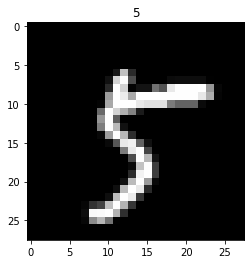

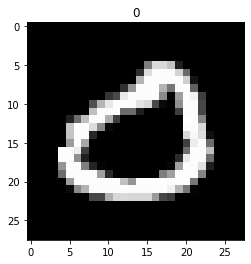

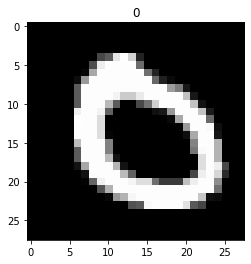

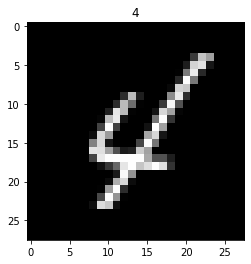

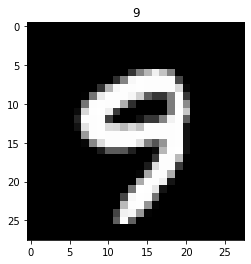

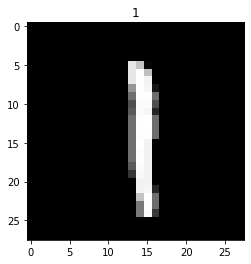

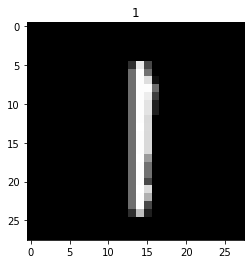

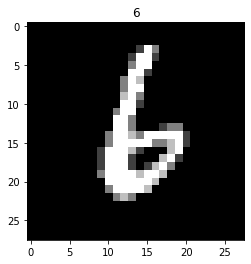

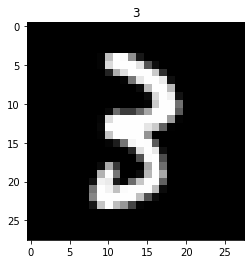

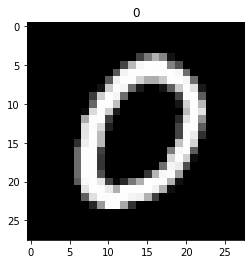

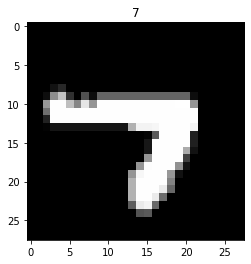

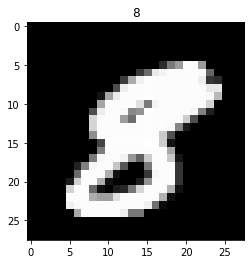

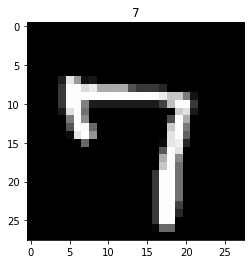

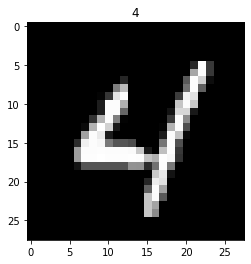

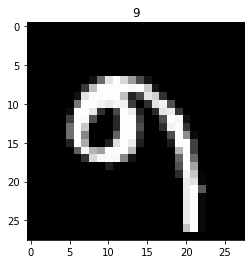

In [5]:
X = df.drop('label', axis=1)
y = df['label']

for i in range(15):
    im = np.random.randint(0, len(df)-1)
    plt.imshow(X.loc[im, :].values.reshape((28, 28)), cmap='gray')
    plt.title(y[im])
    plt.show()

Tambien consideramos necesario revisar cuantas imagenes hay por numero, y ver si todas corresponden a dígitos del 0 al 9.

In [6]:
y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

### 1.2. Redes Neuronales Simples

In [18]:
Y = pd.get_dummies(y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [26]:
model_1_2 = Sequential()
model_1_2.add(Dense(84, input_shape=(784,), activation='relu'))
model_1_2.add(Dense(56, activation='relu'))
model_1_2.add(Dense(10, activation='softmax'))

In [27]:
model_1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1_2 = model_1_2.fit(X_train, Y_train, epochs=100, validation_split=0.20, batch_size=512, verbose=2)

Epoch 1/100
53/53 - 1s - loss: 12.1476 - accuracy: 0.6353 - val_loss: 2.7650 - val_accuracy: 0.7804 - 1s/epoch - 24ms/step
Epoch 2/100
53/53 - 0s - loss: 1.8733 - accuracy: 0.8158 - val_loss: 1.6730 - val_accuracy: 0.8052 - 400ms/epoch - 8ms/step
Epoch 3/100
53/53 - 0s - loss: 1.0813 - accuracy: 0.8391 - val_loss: 1.1945 - val_accuracy: 0.8241 - 399ms/epoch - 8ms/step
Epoch 4/100
53/53 - 0s - loss: 0.7595 - accuracy: 0.8575 - val_loss: 0.9846 - val_accuracy: 0.8348 - 355ms/epoch - 7ms/step
Epoch 5/100
53/53 - 0s - loss: 0.5857 - accuracy: 0.8773 - val_loss: 0.8853 - val_accuracy: 0.8533 - 372ms/epoch - 7ms/step
Epoch 6/100
53/53 - 0s - loss: 0.4601 - accuracy: 0.8959 - val_loss: 0.7873 - val_accuracy: 0.8615 - 362ms/epoch - 7ms/step
Epoch 7/100
53/53 - 0s - loss: 0.3830 - accuracy: 0.9078 - val_loss: 0.7594 - val_accuracy: 0.8696 - 367ms/epoch - 7ms/step
Epoch 8/100
53/53 - 0s - loss: 0.3284 - accuracy: 0.9179 - val_loss: 0.7473 - val_accuracy: 0.8732 - 401ms/epoch - 8ms/step
Epoch 9/1

Epoch 67/100
53/53 - 0s - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.6177 - val_accuracy: 0.9379 - 405ms/epoch - 8ms/step
Epoch 68/100
53/53 - 0s - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.6318 - val_accuracy: 0.9388 - 369ms/epoch - 7ms/step
Epoch 69/100
53/53 - 0s - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.6233 - val_accuracy: 0.9411 - 417ms/epoch - 8ms/step
Epoch 70/100
53/53 - 0s - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.5929 - val_accuracy: 0.9385 - 467ms/epoch - 9ms/step
Epoch 71/100
53/53 - 0s - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.6813 - val_accuracy: 0.9391 - 450ms/epoch - 8ms/step
Epoch 72/100
53/53 - 0s - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.6500 - val_accuracy: 0.9400 - 468ms/epoch - 9ms/step
Epoch 73/100
53/53 - 0s - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.6339 - val_accuracy: 0.9426 - 482ms/epoch - 9ms/step
Epoch 74/100
53/53 - 0s - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.6323 - val_accuracy: 0.9418 - 419ms/epoch - 8ms/step


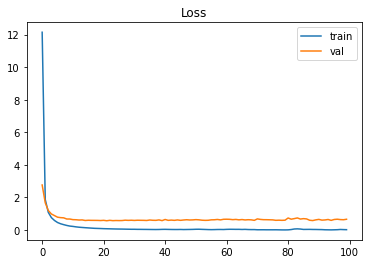

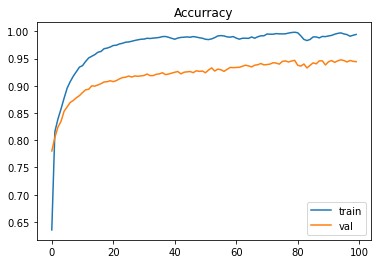

In [36]:
plt.plot(history_1_2.history['loss'], label='train')
plt.plot(history_1_2.history['val_loss'], label='val')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(history_1_2.history['accuracy'], label='train')
plt.plot(history_1_2.history['val_accuracy'], label='val')
plt.title('Accurracy')
plt.legend()
plt.show()

Este modelo mejoro bastante en los primeros 20 epochs, y de ahí fue mejorando poco a poco. Vemos a lo lejos que habia un tendencia muy pequeña de seguir creciendo, por lo que existe la posibilidad de que todavía la podiamos ajusta un poco más. Al final obtuvo un 0.93 de accuracy aproximadamente en el test.

In [46]:
results = np.zeros(3, dtype='float')
results[0] = model_1_2.evaluate(X_test, Y_test, verbose=0)[1]
print('train accuracy:', history_1_2.history['accuracy'][-1])
print('validation accuracy:', history_1_2.history['val_accuracy'][-1])
print('test accuracy:', results[0])

train accuracy: 0.9944568276405334
validation accuracy: 0.9444940686225891
test accuracy: 0.9470238089561462


### 1.3. Deep Learning

In [37]:
model_1_3 = Sequential()
model_1_3.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation='relu'))
model_1_3.add(MaxPooling2D(pool_size=(2, 2)))
model_1_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_1_3.add(MaxPooling2D(pool_size=(2, 2)))
model_1_3.add(Flatten())
model_1_3.add(Dense(128, activation='relu'))
model_1_3.add(Dense(10, activation='softmax'))

In [38]:
model_1_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1_3 = model_1_3.fit(X_train.values.reshape(-1, 28, 28, 1), Y_train, epochs=10, validation_split=0.20, batch_size=512, verbose=2)

Epoch 1/10
53/53 - 8s - loss: 3.8235 - accuracy: 0.7125 - val_loss: 0.2822 - val_accuracy: 0.9107 - 8s/epoch - 151ms/step
Epoch 2/10
53/53 - 7s - loss: 0.1842 - accuracy: 0.9436 - val_loss: 0.1505 - val_accuracy: 0.9515 - 7s/epoch - 126ms/step
Epoch 3/10
53/53 - 7s - loss: 0.1012 - accuracy: 0.9684 - val_loss: 0.1175 - val_accuracy: 0.9629 - 7s/epoch - 127ms/step
Epoch 4/10
53/53 - 7s - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.1099 - val_accuracy: 0.9635 - 7s/epoch - 128ms/step
Epoch 5/10
53/53 - 7s - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0954 - val_accuracy: 0.9714 - 7s/epoch - 134ms/step
Epoch 6/10
53/53 - 7s - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0940 - val_accuracy: 0.9705 - 7s/epoch - 140ms/step
Epoch 7/10
53/53 - 8s - loss: 0.0226 - accuracy: 0.9942 - val_loss: 0.0913 - val_accuracy: 0.9723 - 8s/epoch - 145ms/step
Epoch 8/10
53/53 - 8s - loss: 0.0162 - accuracy: 0.9965 - val_loss: 0.0866 - val_accuracy: 0.9747 - 8s/epoch - 145ms/step
Epoch 9/10
53/53 - 7s - 

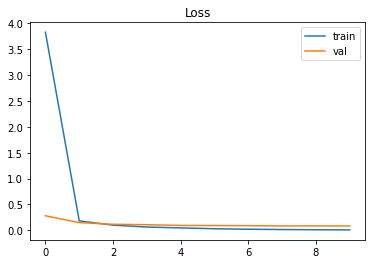

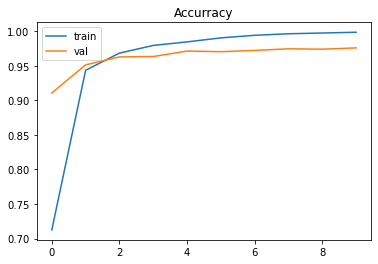

In [39]:
plt.plot(history_1_3.history['loss'], label='train')
plt.plot(history_1_3.history['val_loss'], label='val')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(history_1_3.history['accuracy'], label='train')
plt.plot(history_1_3.history['val_accuracy'], label='val')
plt.title('Accurracy')
plt.legend()
plt.show()

En este caso vemos que en los primeros dos epochs el modelo alcanza reultados bastante mejores, aunque cada epoch tuvo un tiempo de ejecucion mucho mayor. Vemos que incluso seguia creciendo ligeraemtne cuando lo detuvimos en 10 epochs, por lo que con mucho mas tiempo de entreneamiento puede que este modelo haya mejorado aun más. Aún así se obtuvo un accuracy bastante alto de 0.98 aproximadamente.

In [47]:
results[1] = model_1_3.evaluate(X_test.values.reshape(-1, 28, 28, 1), Y_test, verbose=0)[1]
print('train accuracy:', history_1_3.history['accuracy'][-1])
print('validation accuracy:', history_1_3.history['val_accuracy'][-1])
print('test accuracy:', results[1])

train accuracy: 0.9986607432365417
validation accuracy: 0.9760416746139526
test accuracy: 0.9789285659790039


### 1.4. Gradient Boosting Trees

In [41]:
model_xgb = xgb.XGBClassifier()
model_1_4 = MultiOutputClassifier(model_xgb)

In [43]:
model_1_4.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None,
                                              reg_alpha=None, reg_lambda=None, ...))

In [49]:
Y_train_pred = model_1_4.predict(X_train)
Y_test_pred = model_1_4.predict(X_test)
results[2] = accuracy_score(Y_test, Y_test_pred)
print('train accuracy:', accuracy_score(Y_train, Y_train_pred))
print('test accuracy:', results[2])

train accuracy: 1.0
test accuracy: 0.9482142857142857


### 1.5. Test Mejor Modelo

### 1.6. Comparacion Modelos

## Ejercicio 2

### 2.2. Modelos LSTM

### 2.3. Resultados